In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
def opener():
    driver_path = "C:/Program Files/BraveSoftware/Brave-Browser/Application/chromedriver.exe"
    brave_path = "C:/Program Files/BraveSoftware/Brave-Browser/Application/brave.exe"

    option = webdriver.ChromeOptions()
    option.binary_location = brave_path
    # option.add_argument("--incognito") #OPTIONAL
    #option.add_argument("--headless") #OPTIONAL

    # Create new Instance of Chrome
    browser = webdriver.Chrome(executable_path=driver_path, chrome_options=option)
    browser.get("https://medium.com/better-programming")
    time.sleep(5)
    return browser

In [3]:
def scrape(browser,count=1):
    file=open('output.txt','w+')
    while(count<100):
        try:
            path=f'/html/body/div/div/div[3]/div/div/main/div/div[2]/div/article[{count}]/div/div/div/div/div/div[2]/div/div[1]/div/div/div/div/div[1]/div[1]/a/div[1]/h2'
            count+=1
            element = WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.XPATH, path)))
            title=browser.find_element_by_xpath(path).text
            file.write(title+'\n')
        except:
            scroll(browser)
    file.close()

In [4]:
def scroll(browser):
    html=browser.find_element_by_tag_name('html')
    html.send_keys(Keys.END)
    time.sleep(5)

In [5]:
browser=opener()
scrape(browser)
browser.close()

In [6]:
from pigcount import WordCount
mr_job = WordCount(args=['output.txt'])
counts=[]
with mr_job.make_runner() as runner:
    runner.run()
    for key, value in mr_job.parse_output(runner.cat_output()):
        counts.append((key,value))
counts.sort(key = lambda x: x[1], reverse=True)
print(counts)

No configs specified for inline runner


[('to', 35), ('in', 26), ('with', 24), ('and', 22), ('how', 19), ('using', 14), ('your', 14), ('the', 13), ('for', 12), ('an', 11), ('python', 11), ('code', 9), ('aws', 8), ('design', 8), ('more', 8), ('build', 7), ('ios', 7), ('use', 7), ('bps', 6), ('daily', 6), ('digest', 6), ('from', 6), ('on', 6), ('of', 5), ('architecture', 4), ('data', 4), ('django', 4), ('it', 4), ('lambda', 4), ('pattern', 4), ('api', 3), ('application', 3), ('apps', 3), ('contract', 3), ('create', 3), ('flutter', 3), ('go', 3), ('is', 3), ('javascript', 3), ('nodejs', 3), ('smart', 3), ('swift', 3), ('uitabbar', 3), ('up', 3), ('why', 3), ('writing', 3), ('all', 2), ('analysis', 2), ('app', 2), ('art', 2), ('at', 2), ('autoscaling', 2), ('backend', 2), ('building', 2), ('clean', 2), ('creating', 2), ('discord', 2), ('dribbblelike', 2), ('elastic', 2), ('ethereum', 2), ('format', 2), ('game', 2), ('games', 2), ('generics', 2), ('guide', 2), ('halide', 2), ('hard', 2), ('implement', 2), ('instead', 2), ('interv

In [7]:
langs=open('lang.txt','r')
langs=langs.read().split('\n')
lang=[]
for i in langs:
    i=i.split(',')[0]
    lang.append(''.join(char for char in i if char.isalnum()).lower())
print(lang)

['anet', 'aaxiom', 'a0system', 'a', 'a', 'abap', 'abc', 'abcalgol', 'abset', 'absys', 'acc', 'accent', 'acedasl', 'acl2', 'actiii', 'action', 'actionscript', 'ada', 'adenine', 'agda', 'agilentvee', 'agora', 'aimms', 'alef', 'alf', 'algol58', 'algol60', 'algol68', 'algolw', 'alice', 'alma0', 'ambienttalk', 'amigae', 'amos', 'ampl', 'apexsalesforcecom', 'apl', 'appinventorforandroidsvisualblocklanguage', 'applescript', 'arc', 'arexx', 'argus', 'aspectj', 'assemblylanguage', 'ats', 'atejipx', 'autohotkey', 'autocoder', 'autoit', 'autolispvisuallisp', 'averest', 'awk', 'axum', 'b', 'babbage', 'bash', 'basic', 'bc', 'bcpl', 'beanshell', 'batchwindowsdos', 'bertrand', 'beta', 'bigwig', 'bistro', 'bitc', 'bliss', 'blockly', 'bloop', 'blue', 'boo', 'boomerang', 'bourneshellincluding', 'bashand', 'ksh', 'brew', 'bpel', 'c', 'c', 'câisoiec14882', 'câisoiec23270', 'cal', 'cachãobjectscript', 'cshell', 'caml', 'cayenne', 'cduce', 'cecil', 'cel', 'cesil', 'ceylon', 'cfengine', 'cfml', 'cg', 'ch', '

In [8]:
lang_count=[]
for i in counts:
    if i[0] in lang:
        lang_count.append(i)

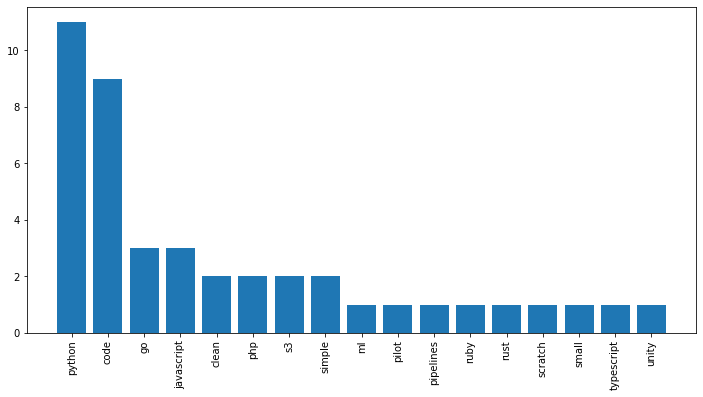

In [9]:
import matplotlib.pyplot as plt
#create a bar chart using lang_count
plt.figure(figsize=(12,6))
plt.bar(range(len(lang_count)), [i[1] for i in lang_count], align='center')
plt.xticks(range(len(lang_count)), [i[0] for i in lang_count], rotation=90)
plt.show()